In [1]:
import pandas as pd
import seaborn as sns
import os
import sys
sys.path.insert(0, os.environ['PLOT_SETTINGS_DIR'])
# import plot_settings
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.get_data_path()
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']= 'STIXGeneral'
mpl.rcParams['mathtext.fontset']= 'stix'
mpl.rcParams['font.size']= 24
# mpl.font_manager.rebuild()

args = dict(palette='tab10', x='')

df = pd.read_csv('../data/kuramoto_linear_comparison_quantized.csv')
df['graph'] = df['graph'].str.extract(r'/([\w\d]+)$')
df['Precision'] = df['bits'].astype(str) + 'b'
df['Precision'] = df['Precision'].replace({'0b': "Full"})
df['solver'] = df['solver'].replace({'brim': "Linear", 'kuramoto': 'Kuramoto'})
df = df.rename(columns={'epoch':"Epoch ($\\tau$)", 'cut':"Cut"})
bks_df = pd.read_csv('../gset_benchmarks/bks_values.csv')
df = df.merge(bks_df, on='graph')
df['R'] = df['Cut'] / df['BKS']
df['InvR'] = 1-df['R']
df['Device Model'] = df['solver']
df['Subsystems'] = df['blocks']

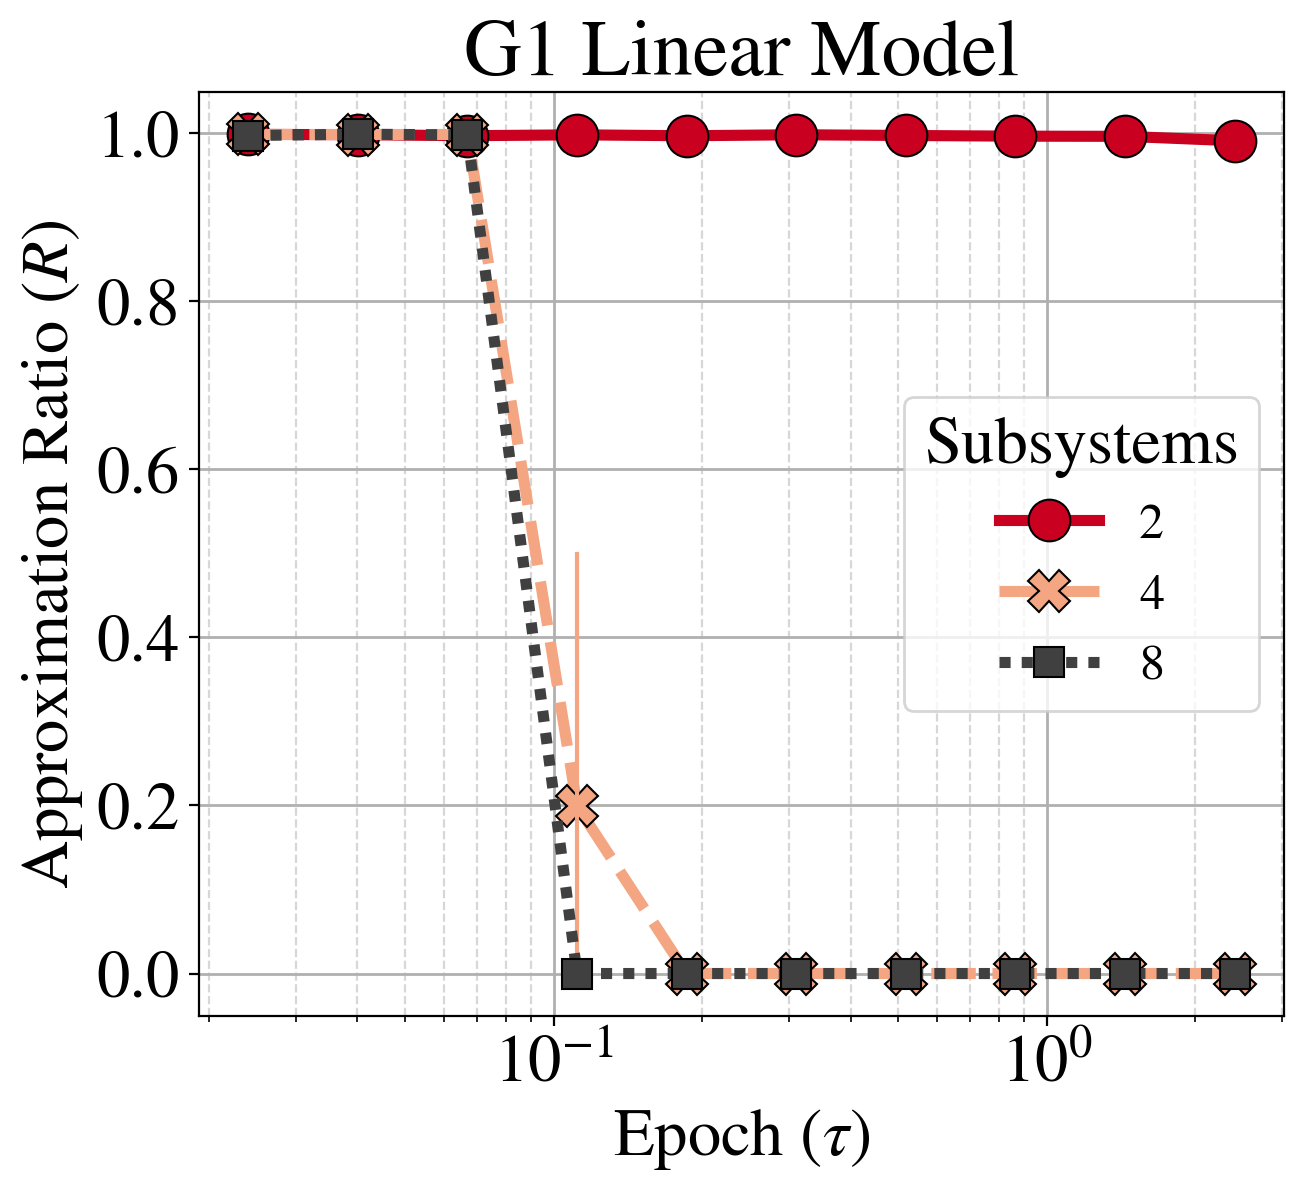

In [2]:

palette = [
    '#ca0020',
    "#f4a582",
    # "#bababa",
    '#404040'
]
fig, ax = plt.subplots(figsize=(7,6), dpi=200)
sns.lineplot(ax=ax, 
            palette=palette,
            data=df.query('graph == "G001" and Precision == "Full" and `Device Model` == "Linear"'), 
            x='Epoch ($\\tau$)', 
            y='R',
            hue='Subsystems',
            style='Subsystems',
            markers=True,
            err_style='bars',
            linestyle='--',
            markeredgecolor='black',
            linewidth=4,
            markersize=15
            )
# ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Approximation Ratio ($R$)')
ax.legend(fontsize=18, title='Subsystems')
# ax.set_ylabel('Cut Error (1-R)')
ax.grid(which='minor', linestyle='--', alpha=0.5)
ax.grid(which='major', linewidth=1)
ax.set_title('G1 Linear Model')
fig.savefig('../figures/fig_4a_g1_linear_diverge.pdf', bbox_inches='tight', dpi=300)

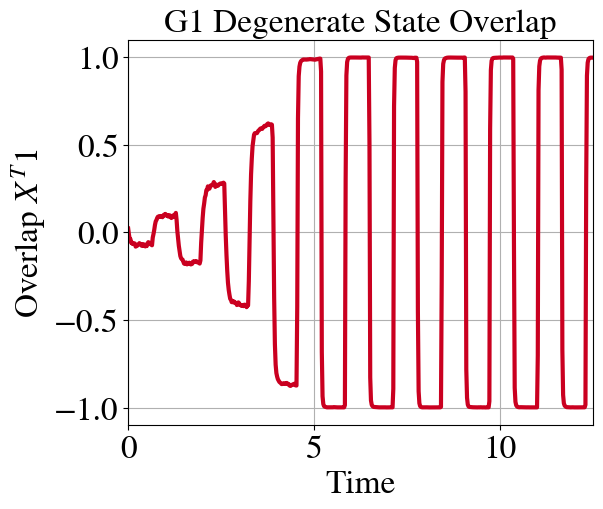

In [3]:
overlap_df = pd.read_csv('../data/g1_overlap.csv')
fig, ax= plt.subplots(figsize=(6,5))
ax=sns.lineplot(data=overlap_df, x='time', y='overlap', linewidth=3, color="#ca0020")
ax.set_ylabel('Overlap $X^T$1')
ax.set_xlabel('Time')
ax.set_title('G1 Degenerate State Overlap', fontsize=24)
ax.set_xlim(0,12.5)
ax.grid()
fig.savefig('../figures/fig_4b_g1_overlap.pdf', bbox_inches='tight')